RAIN - Real & Artificial Intelligence for Neuroscience

## Automatic analysis
- Use a trained model from `4-Create_models` to automatically label exploratory behaviour in position files.

#### Requirements:
- The position.csv files.
- A trained model.

---
#### Load the necessary modules

In [1]:
import os
import rainstorm.modeling as rst

rainstorm.modeling successfully imported. GPU devices detected: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


---
#### 1. State your project path
All we need to define is the path to the same folder we used in `2-Prepare_positions`, and the path to the parameters file (which contains the parameters for automatic analysis).

In [2]:
# State your path:
base = r'C:\Users\dhers\Desktop\RAINSTORM'
folder_path = os.path.join(base, r'docs\examples\NOR_example')
params = os.path.join(folder_path, 'params.yaml')

---
#### 2. Run the model on all the data selected

In [5]:
rst.create_autolabels(params)

461/461 [==============================] - 7s 11ms/step
Saved autolabels to NOR_TR_C1_A_autolabels.csv
460/460 [==============================] - 5s 11ms/step
Saved autolabels to NOR_TR_C1_B_autolabels.csv
462/462 [==============================] - 5s 11ms/step
Saved autolabels to NOR_TR_C1_C_autolabels.csv
467/467 [==============================] - 3s 7ms/step
Saved autolabels to NOR_TR_C1_D_autolabels.csv
464/464 [==============================] - 5s 10ms/step
Saved autolabels to NOR_TR_C2_A_autolabels.csv
466/466 [==============================] - 5s 10ms/step
Saved autolabels to NOR_TR_C2_B_autolabels.csv
466/466 [==============================] - 4s 9ms/step
Saved autolabels to NOR_TR_C2_C_autolabels.csv
469/469 [==============================] - 4s 9ms/step
Saved autolabels to NOR_TR_C2_D_autolabels.csv
454/454 [==============================] - 4s 9ms/step
Saved autolabels to NOR_TR_C3_A_autolabels.csv
445/445 [==============================] - 4s 9ms/step
Saved autolabels to NO

---
---
#### A new csv file was created for each video, containing the autolabels.

We can:
- Continue on this notebook and compare the results of the manual, geometric & automatic methods on our example files
- Skip the methods comparison, go straight to Seize_labels.ipynb and use the autolabels to plot the results of the experiment
---

## Compare labels
Lets do a quick recap of what we have done so far...

- Recorded mice exploring objects.
- Analyzed the videos using DeepLabCut, a pose estimation toolkit.
- **Manually labeled** the positions of the mice using the Rainstorm Behavioral Tagger.
- Processed the positions on 1-Prepare_positions.ipynb.
- **Geometrically labeled** the positions on 2-Geometric_labeling.ipynb.
- Trained some Artificial Neural Networks on 3-Create_models.ipynb.
- **Automatically labeled** the positions on 4-Automatic_analysis.ipynb.

And here we are! Now, we can compare manual labels, geolabels & autolabels.

I have labeled the example videos myself using the RAINSTORM labeler tool, and left those manual labels available on the example folder.

If you want to see the original videos and label them to compare yourself with the machine, feel free to write: sdhers@fbmc.fcen.uba.ar

In [3]:
from glob import glob
import pandas as pd

TS_position = glob(os.path.join(folder_path,"TS/position/*position.csv")) # Notice that I added 'TS' on the folder name to only compare files from the testing session
TS_manual_labels = glob(os.path.join(folder_path,"TS/labels/*labels.csv"))
TS_geolabels = glob(os.path.join(folder_path,"TS/geolabels/*labels.csv"))
TS_autolabels = glob(os.path.join(folder_path,"TS/autolabels/*labels.csv"))

---
#### 4. We can open an example file and it's labels

In [4]:
# Choose an example file to plot:
example_path = TS_position[5]
example_position = pd.read_csv(example_path)
example_geolabels = pd.read_csv(example_path.replace('position', 'geolabels'))
example_autolabels = pd.read_csv(example_path.replace('position', 'autolabels'))
example_manual_labels = pd.read_csv(example_path.replace('position', 'labels'))

---
#### 5. Polar graph
A great way of visualizing the distance and angle of approach to an object is to use a polar graph. The distance is represented in the radius of the circle, and the circumference represents the angle of the vector from the head to the nose.

Since the graph is symmetrical, we will use the left side to color the automatic labels in red, and the right side to color the manual labels in blue. The graph will also show the geometric labels as all the points that fit inside the dashed line.

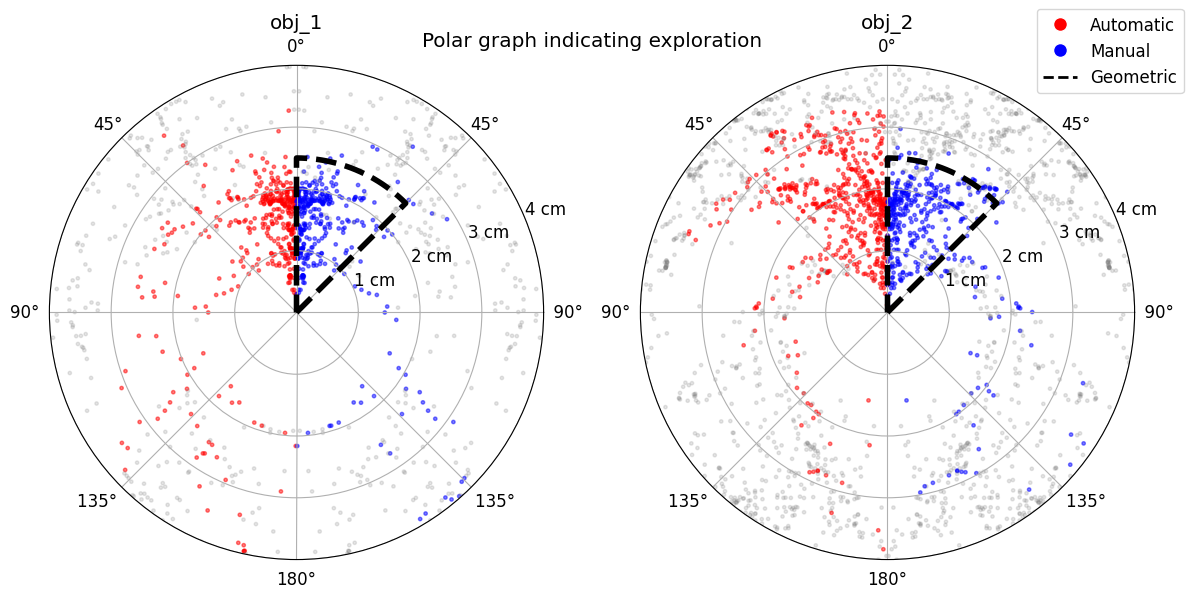

In [5]:
# Since the geometric and automatic labels are slightly shorter (due to the time when the mouse hasn't yet entered the arena), we need to remove the first few rows from the manual labels.
len_dif = len(example_manual_labels) - len(example_geolabels)
example_manual_labels = example_manual_labels.iloc[len_dif:].reset_index(drop=True)

rst.polar_graph(example_position, example_autolabels, example_manual_labels)

#### We can load all the data from all the available files and plot the polar graph again

In [6]:
# Create an empty list to store DataFrames
for_manual_labels = []
for_geolabels = []
for_autolabels = []
for_position = []

for i in range(len(TS_position)):

    df_position = pd.read_csv(TS_position[i])
    for_position.append(df_position)

    df_manual_labels = pd.read_csv(TS_manual_labels[i])
    len_dif = len(df_manual_labels) - len(df_position)
    df_manual_labels = df_manual_labels.iloc[len_dif:].reset_index(drop=True)
    for_manual_labels.append(df_manual_labels)

    df_geolabels = pd.read_csv(TS_geolabels[i])
    for_geolabels.append(df_geolabels)

    df_autolabels = pd.read_csv(TS_autolabels[i])
    for_autolabels.append(df_autolabels)
     

# Concatenate all DataFrames into a single DataFrame
all_manual_labels = pd.concat(for_manual_labels, ignore_index=True)
all_geolabels = pd.concat(for_geolabels, ignore_index=True)
all_autolabels = pd.concat(for_autolabels, ignore_index=True)
all_position = pd.concat(for_position, ignore_index=True)

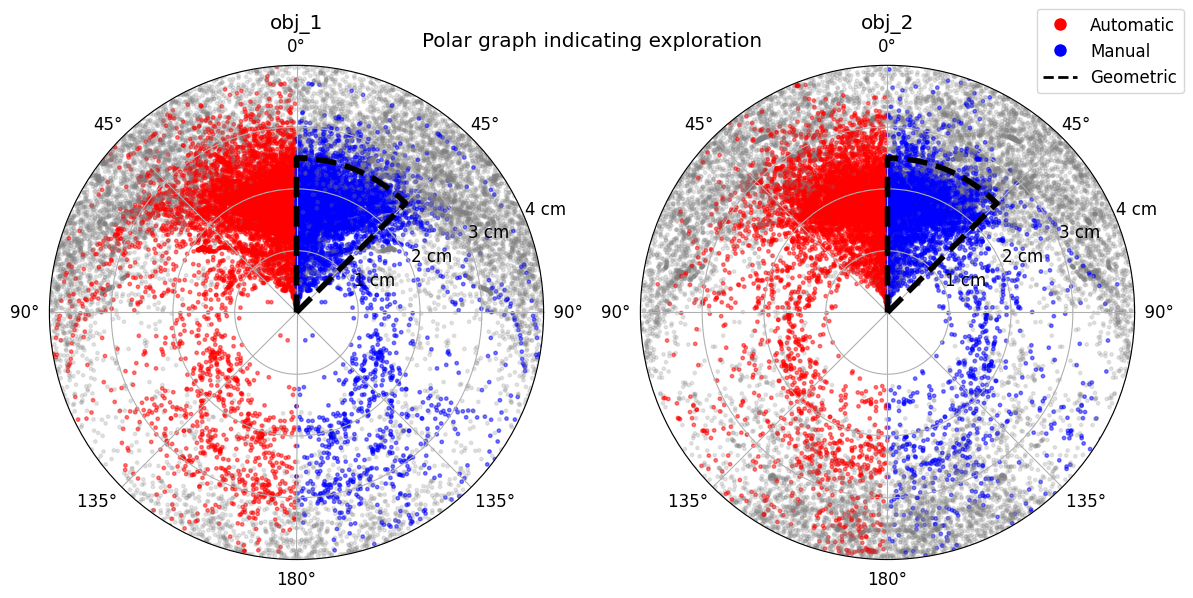

In [7]:
rst.polar_graph(all_position, all_autolabels, all_manual_labels) # This time it might take a few seconds

---
#### 6. Evaluate accuracy of predictions
Finally, we can evaluate the accuracy of the predictions by comparing the geometric and automatic labels to the manual labels.

In [8]:
rst.accuracy_scores(all_manual_labels, all_geolabels, "geometric")
rst.accuracy_scores(all_manual_labels, all_autolabels, "automatic", threshold=0.8)

Mice explored 6.96052070140267% of the time.
The geometric method measured 6.29880729036147% of the time as exploration.
It got 24.47212221465408% of false negatives and 14.965456845382894% of false positives.
Mice explored 6.96052070140267% of the time.
The automatic method measured 6.686895094380516% of the time as exploration.
It got 19.51931497518731% of false negatives and 16.697479809282864% of false positives.


---
---
#### Both geometric and automatic methods are flawed when compared to human labeling. However, as the human responsible for the example manual labels provided, let me tell you that I too am flawed. Probably if more people labeled these videos and we compare against the average labels, we would have less error.

We can:
- Go to 5-Seize_labels.ipynb and use your favorite labels (geo, auto or manual) to plot the results of the experiment.

---
RAINSTORM - Created on Apr 18, 2024 - @author: Santiago D'hers